<br>
<br>

# `#Time serics Analysis:`

<br>
<br>

In [55]:
#%pip install yfinance

In [56]:

import yfinance as yf 
import seaborn as sns 
import matplotlib.pyplot as plt 

<br>

# `#01 ClassicialTime Serics Decomposition:`

<br>

In [57]:
# yf = Yahoo Finance
# tickers: is a shorthand abberation for downloading data.
# AAPL = Applae company
stock_data = yf.download(tickers="AAPL",start="2024-01-01")



/tmp/ipykernel_139936/3205488879.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers="AAPL",start="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [58]:
stock_data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081512,186.858009,182.346204,185.578830,82488700
2024-01-03,182.703186,184.319507,181.890063,182.673439,58414500
2024-01-04,180.382828,181.552914,179.361476,180.620803,71983600
2024-01-05,179.658951,181.225688,178.657435,180.462163,62379700
2024-01-08,184.002182,184.041855,179.976269,180.561312,59144500


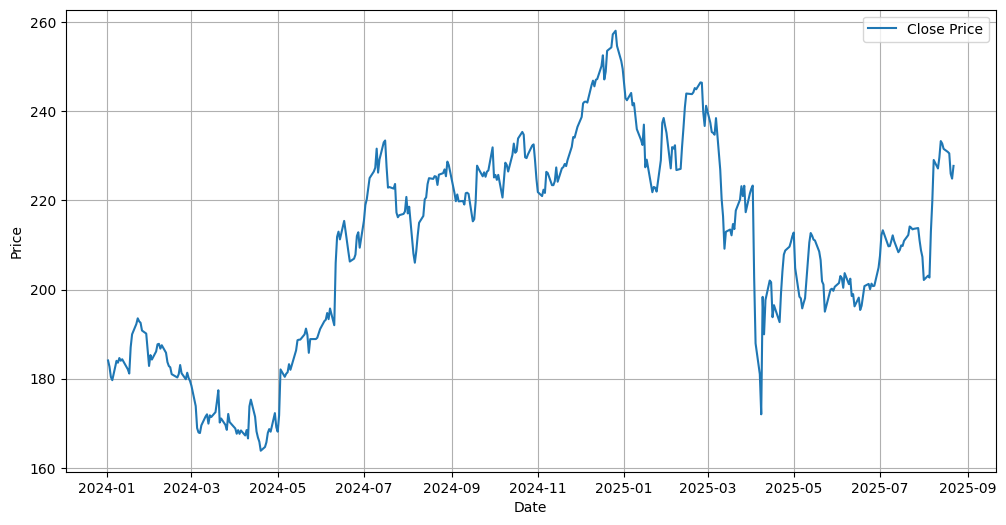

In [59]:

# draw the close price:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index,stock_data["Close"],label="Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

In [60]:
#%pip install statsmodels

In [61]:
""" 
We can do both additive and multiplicative decomposition with seasonal_decompose
or classical decomposition
"""
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_additive = seasonal_decompose(x=stock_data["Close"],model="additive",period=30)
decompose_additive

In [62]:

additive_trend = decompose_additive.trend
additive_seasonal = decompose_additive.seasonal
additive_residual = decompose_additive.resid # resid = residual/noise

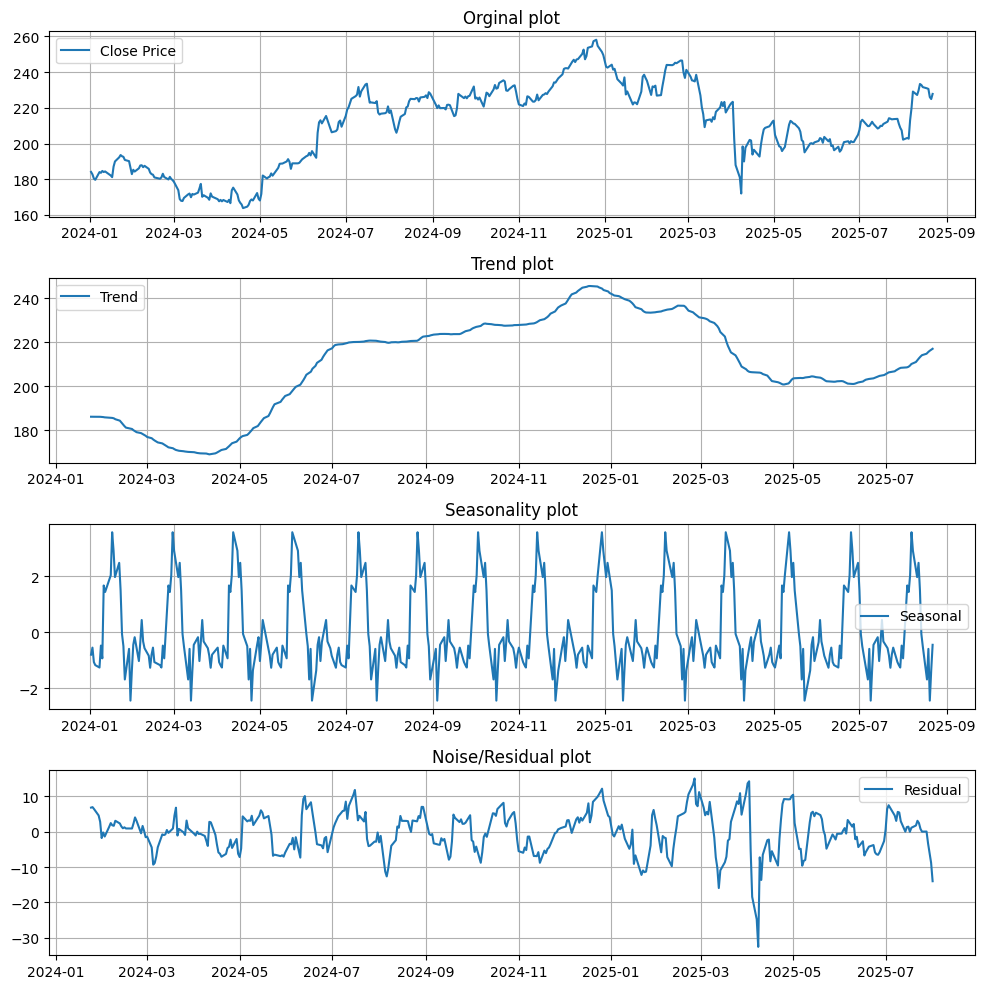

In [63]:

#plot:
fig,ax = plt.subplots(4,1,figsize=(10,10))

ax[0].plot(stock_data["Close"],label="Close Price")
ax[0].set_title("Orginal plot")
ax[0].legend(loc="upper left")
ax[0].grid(True)

ax[1].plot(additive_trend,label="Trend")
ax[1].set_title("Trend plot")
ax[1].legend(loc="upper left")
ax[1].grid(True)

ax[2].plot(additive_seasonal,label="Seasonal")
ax[2].set_title("Seasonality plot")
ax[2].legend()
ax[2].grid(True)

ax[3].plot(additive_residual,label="Residual")
ax[3].set_title("Noise/Residual plot")
ax[3].legend()
ax[3].grid(True)


plt.tight_layout()
plt.show()



<br>
<br>

# `#02: STL Decomposition:`

<br>
<br>

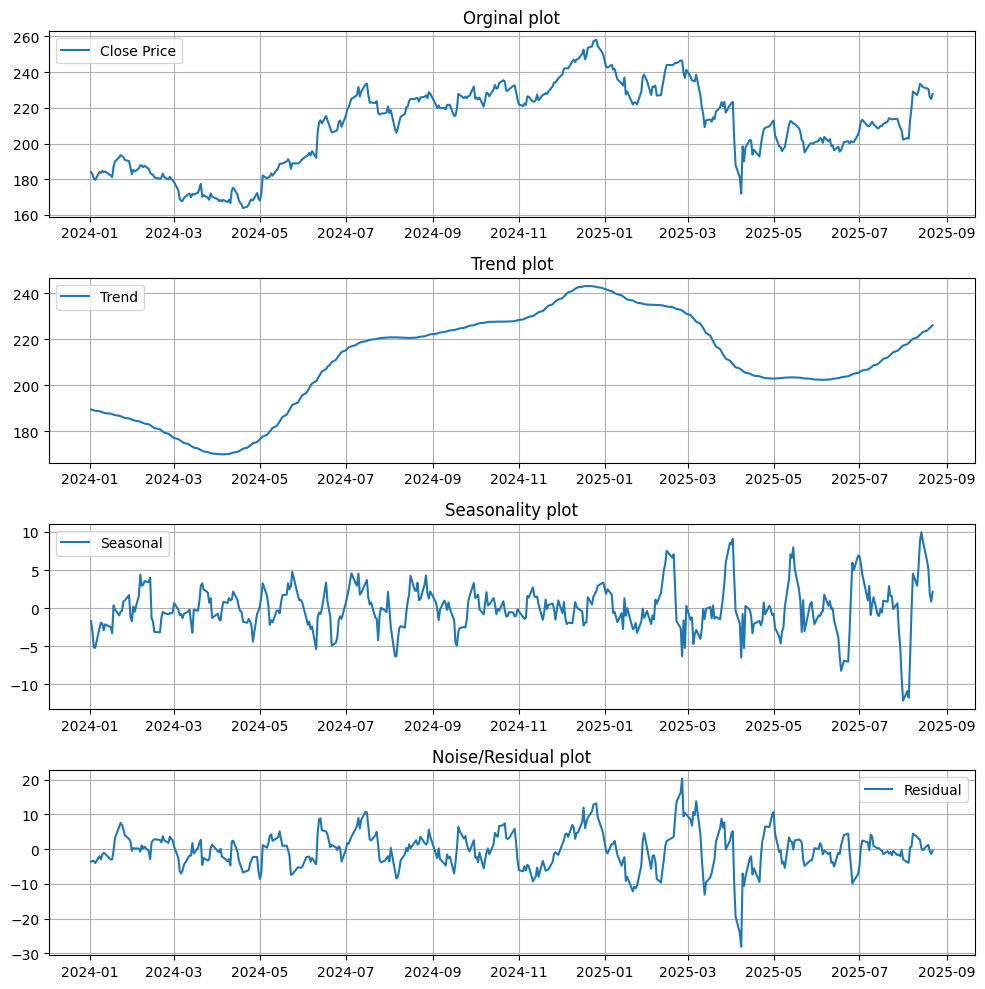

In [64]:

from statsmodels.tsa.seasonal import STL 

# Only support additive model. 
decompose_additive = STL(stock_data["Close"],period=30)
result = decompose_additive.fit()

additive_trend = result.trend
additive_seasonal = result.seasonal
additive_residual = result.resid # resid = residual/noise


#plot:
fig,ax = plt.subplots(4,1,figsize=(10,10))

ax[0].plot(stock_data["Close"],label="Close Price")
ax[0].set_title("Orginal plot")
ax[0].legend(loc="upper left")
ax[0].grid(True)

ax[1].plot(additive_trend,label="Trend")
ax[1].set_title("Trend plot")
ax[1].legend(loc="upper left")
ax[1].grid(True)

ax[2].plot(additive_seasonal,label="Seasonal")
ax[2].set_title("Seasonality plot")
ax[2].legend()
ax[2].grid(True)

ax[3].plot(additive_residual,label="Residual")
ax[3].set_title("Noise/Residual plot")
ax[3].legend()
ax[3].grid(True)


plt.tight_layout()
plt.show()


